In [261]:
%pip install pandas 
%pip install numpy 
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install pickle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pickle


In [263]:
# DataSets
books = pd.read_csv('../dataSet/Books.csv')
ratings = pd.read_csv('../dataSet/Ratings.csv')
users = pd.read_csv('../dataSet/Users.csv')

/var/folders/32/01d39x_s1sn9ywcywln8d29r0000gn/T/ipykernel_15132/1529049141.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('../dataSet/Books.csv')


In [264]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [265]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [266]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### EDA of Books

In [267]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [268]:
books['Year-Of-Publication'].describe()

count     271360
unique       202
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64

In [269]:
# Non numeric 
non_numeric_count = pd.to_numeric(books['Year-Of-Publication'], errors='coerce').isnull().sum()
print("Number of non-numeric values in 'Years':", non_numeric_count)

print()

non_numeric_indices = books[pd.to_numeric(books['Year-Of-Publication'], errors='coerce').isnull()].index
for idx in non_numeric_indices:
    non_numeric_value = books.loc[idx, 'Year-Of-Publication']
    print(f"Index: {idx}, Value: {non_numeric_value}")



Number of non-numeric values in 'Years': 3

Index: 209538, Value: DK Publishing Inc
Index: 220731, Value: Gallimard
Index: 221678, Value: DK Publishing Inc


In [270]:
books.loc[209538]
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [271]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections

books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher	'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publisher\t
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,nan
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN,DK Publishing Inc


In [272]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publisher\t
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,nan


In [273]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections

books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le"
books.loc[books.ISBN == '2070426769','Publisher	'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publisher\t
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le,2003,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,Gallimard


In [274]:
# Convert to Intege
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [275]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publisher\t
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,nan
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,nan
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,nan
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,nan
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,nan


In [276]:
print("\033[1mTop 5 most published years:\033[0m") 
print(books['Year-Of-Publication'].value_counts().head(5))
print()

print("\033[1mTop 5 most books written by :\033[0m") 
print(books['Book-Author'].value_counts().head(5))

print()
print("\033[1mTop 5 most books publishing company :\033[0m") 
print(books['Publisher'].value_counts().head(5))

Top 5 most published years:
Year-Of-Publication
2002    17627
1999    17431
2001    17359
2000    17234
1998    15766
Name: count, dtype: int64

Top 5 most books written by :
Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Name: count, dtype: int64

Top 5 most books publishing company :
Publisher
Harlequin           7535
Silhouette          4220
Pocket              3905
Ballantine Books    3783
Bantam Books        3646
Name: count, dtype: int64


Null Values
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64


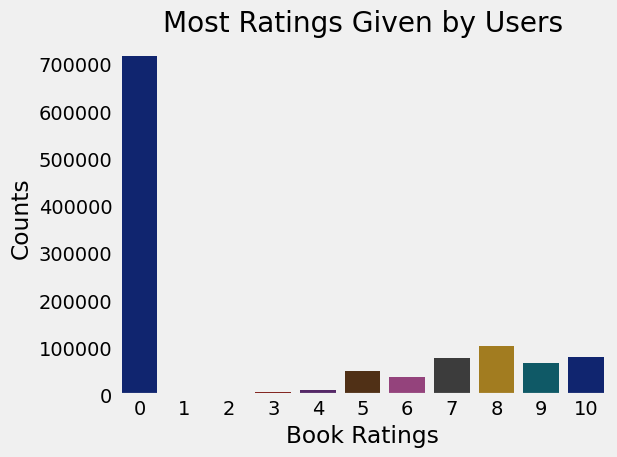

In [277]:

print('Null Values')
print(ratings.isnull().sum())
print()
print(ratings['Book-Rating'].describe())


plt.style.use('fivethirtyeight')

# Use the DataFrame in countplot
sns.countplot(data=ratings, x='Book-Rating', palette='dark', hue='Book-Rating', legend=False)


plt.title('Most Ratings Given by Users')
plt.xlabel('Book Ratings')
plt.ylabel('Counts')
plt.grid(False)
plt.tight_layout()

# Removing top and left spines
sns.despine(top=True, left=True, right=True)

plt.show()

In [278]:
print(users.info())
print()

print("\033[1m Null Values \033[0m")
print(users.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None

 Null Values 
User-ID          0
Location         0
Age         110762
dtype: int64


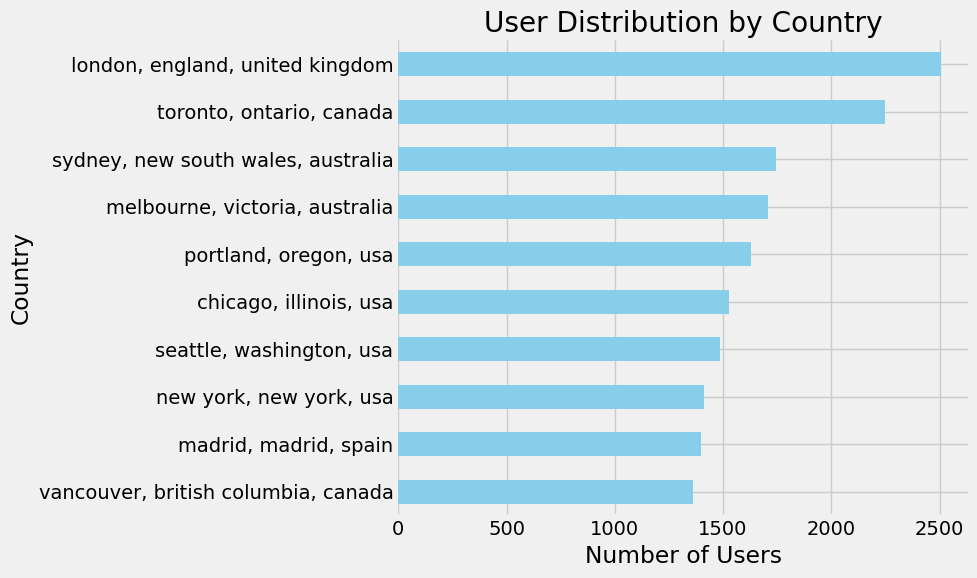

In [279]:

# Count occurrences of each country
country_counts = users['Location'].value_counts()

# Select top 15 countries for better visualization (optional)
top_countries = country_counts.head(10)

# Plotting a horizontal bar chart for country distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_countries.sort_values().plot(kind='barh', color='skyblue')  # Sort by values for better alignment
plt.title('User Distribution by Country')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()

plt.gca().spines[['top','left','right']].set_visible(False)

plt.show()


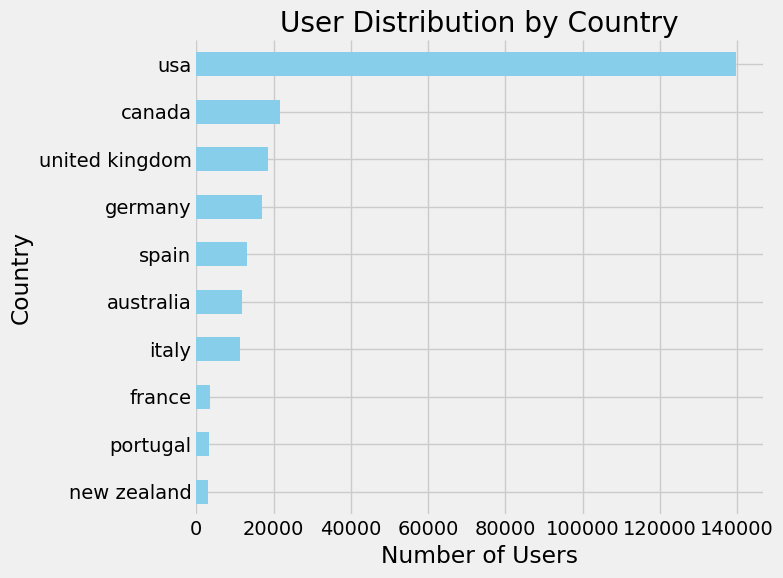

In [280]:

# Create a DataFrame from the sample data
df = pd.DataFrame(users, columns=['Location'])

# Extract country from the 'Location' column
df['Country'] = df['Location'].apply(lambda x: x.split(', ')[-1])

# Count occurrences of each country
country_counts = df['Country'].value_counts()

# Select top countries for visualization (optional)
top_countries = country_counts.head(10)

# Plotting a horizontal bar chart for country distribution
plt.figure(figsize=(8, 6))
top_countries.sort_values().plot(kind='barh', color='skyblue')  
plt.title('User Distribution by Country')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()

# Remove box lines
plt.gca().spines[['top','left','right']].set_visible(False)


plt.show()


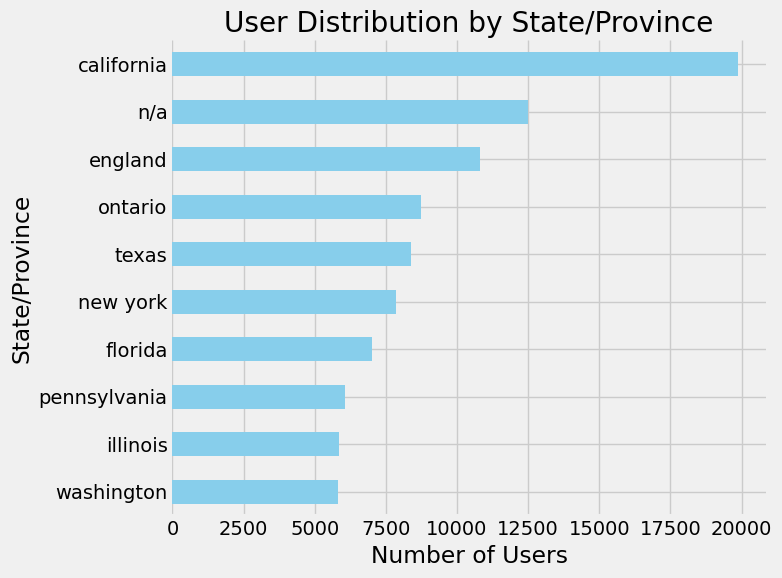

In [281]:

# Create a DataFrame from the sample data
df = pd.DataFrame(users, columns=['Location'])

# Extract state from the 'Location' column
df['State'] = df['Location'].apply(lambda x: x.split(', ')[-2] if len(x.split(', ')) > 2 else None)

# Count occurrences of each state
state_counts = df['State'].value_counts().dropna()

# Select top states for visualization (optional)
top_states = state_counts.head(10)




# Plotting a horizontal bar chart for state distribution
plt.figure(figsize=(8, 6))
top_states.sort_values().plot(kind='barh', color='skyblue')  
plt.title('User Distribution by State/Province')
plt.xlabel('Number of Users')
plt.ylabel('State/Province')
plt.tight_layout()

# Remove box lines
plt.gca().spines[['top','left','right']].set_visible(False)


plt.show()


In [282]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


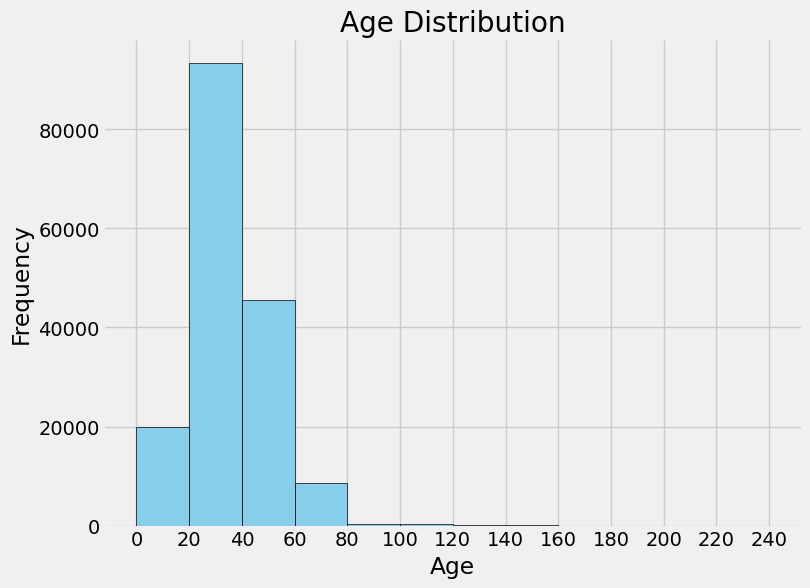

In [283]:

plt.figure(figsize=(8, 6))

# Define bin edges
bin_edges = [x for x in range(0, 251, 20)]  # Bins: 0-20, 20-40, 40-60

# Creating a histogram
plt.hist(users['Age'], bins=bin_edges, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(bin_edges)  # Set x-axis ticks as bin edges

# Remove box lines
plt.gca().spines[['top','left','right','bottom']].set_visible(False)

plt.show()



### Popularity Based Recommender System

In [284]:
#Merge dataSet
ratings_with_name=ratings.merge(books, on='ISBN')

In [285]:
# Make a dataframe based on  count of book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_rating'}, inplace=True)
num_rating_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [286]:
# Make a dataframe based on  count of book

# Convert 'Book-Rating' column to numeric type
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Group by 'Book-Title' and calculate the mean of 'Book-Rating'
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Rename the 'Book-Rating' column to 'avg_rating'
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)

print(avg_rating_df.head())

                                          Book-Title  avg_rating
0   A Light in the Storm: The Civil War Diary of ...        2.25
1                              Always Have Popsicles        0.00
2               Apple Magic (The Collector's series)        0.00
3   Ask Lily (Young Women of Faith: Lily Series, ...        8.00
4   Beyond IBM: Leadership Marketing and Finance ...        0.00


In [287]:
popularity_df=num_rating_df.merge(avg_rating_df, on='Book-Title')
popularity_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [288]:
# Top 50 books based on the avg rating 
popularity_df=popularity_df[popularity_df['num_rating'] >=250].sort_values('avg_rating', ascending=False).head(50)

In [289]:
# Merging this data with the books dataSet
popularity_df=popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author','Image-URL-M',  'Year-Of-Publication', 'num_rating', 'avg_rating']]

### Colloborative Filterting Based Recommender System

In [290]:
# Get the index of the Users whom have rated more than 200 books
x=ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users=x[x].index

In [291]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [292]:
# Get Book-Titles which have more than 50 Book-Rating
y=filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books=y[y].index

In [293]:
final_rating=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [294]:
# duplicates  =   final_rating[final_rating.duplicated(subset = ['ISBN'], keep=False)].sum()
# if duplicates.empty:
#     print('No duplicates')
# else:
#     print('Duplicates hai Paaji ethooo -')
#     print(duplicates)

number_of_duplicates = final_rating.duplicated(subset=['Book-Title']).sum()

print(f"Number of duplicates based on ISBN: {number_of_duplicates}")

print(final_rating.shape)

Number of duplicates based on ISBN: 57880
(58586, 11)


In [295]:
pt=final_rating.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [296]:
pt.fillna(0,inplace=True)

In [297]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
similarity_scores=cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [304]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [305]:
recommend('The Notebook')

[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['One Door Away from Heaven',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582755.01.MZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg']]

In [301]:

file_path='/Users/kavach/Documents/Dev/Jupyter/Book RecSys/website/popularBooks.pkl'


with open(file_path,'wb') as file:
    pickle.dump(popularity_df,file)


In [308]:
file_path='/Users/kavach/Documents/Dev/Jupyter/Book RecSys/website/books_dict.pkl'

with open(file_path,'wb') as file:
    pickle.dump(books.to_dict,file)


In [307]:
file_path='/Users/kavach/Documents/Dev/Jupyter/Book RecSys/website/pt.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(pt,file)


In [ ]:
file_path='/Users/kavach/Documents/Dev/Jupyter/Book RecSys/website/similarity_scores.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(similarity_scores, file)


In [302]:
popularity_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [310]:
booksDict=books.to_dict
booksDict

<bound method DataFrame.to_dict of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author  Year-Of-Publication  \
0         Mark P. O. Morford       